# **The Basics of Image Analysis**

Before starting, enable gpu access in the colab notebook:

- Go to "Edit" --> "Notebook Settings"
- Set the "Hardware Accelerator" to "GPU" and Save

In [1]:
#Importing basic necessary packages
import glob
from skimage.io import imread,imsave
import copy
from google.colab import drive

In [2]:
#Google Specific Lines in order to read files from Drive
#You will need to follow instructions on opened tab
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Reading an Image

#Glob will get all files in a directory
#The directory address will depend where you saved this folder
ImageFiles=glob.glob('./drive/MyDrive/Image Analysis Class/Images/*')

#Reading in the image from the file
CycIFImage=imread(ImageFiles[0])

IndexError: ignored

Today we will be working with a CycIF image from the MCF10A dataset.
CycIF usually contains many many channels. For simplicity today, I have limited the images to 3 channels (Red = Dapi ; Green = CytoKeratin7 ; Blue = Beta-Catenin) 

The number of channels in the image will not affect the functions shown today (displaying an image must select 3 channels because you can't display a bunch of channels simultaneously)

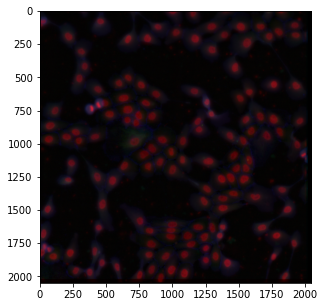

In [ ]:
#Displaying an Image
import matplotlib.pyplot as plt

#Set the size of the displayed figure
plt.rcParams['figure.figsize']=[5,5]

#Show the image
plt.imshow(CycIFImage)

#**Question: What is an Image?**

Answer: Nothing but a matrix, just like most other python objects

Format: Rows, Columns, Channels(colors)

As such we can index, select, and crop from images just like a matrix.

--

Indexing from Images:

Image[ rowStart : rowEnd,    colStart : colEnd,  channels]

*note that   :   in the channel area will get all channels





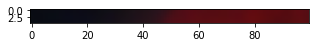

[ 9  9 10 10 10 10 10 10 10 10 11 11 11 11 11 12 12 12 12 12 12 13 13 14
 14 15 15 16 17 18 19 20 21 23 25 26 27 29 30 31 32 34 35 37 39 41 44 47
 50 55 62 68 73 77 79 82 84 85 86 86 85 84 84 84 84 84 85 85 87 87 87 87
 87 88 88 88 90 92 95 97 98 96 94 92 91 90 89 89 90 89 87 85 84 86 89 91
 92 91 88 85]


In [ ]:
#An Image is just a matrix of numbers. We can see that here

#Showing a thin slice of image (gradient from low red to higher red)
plt.imshow(CycIFImage[850:855,0:100,:])
plt.show()

#Showing the corresponding values (increasing in number from low red to high red)
print(CycIFImage[850,0:100,0])

#NOTE: Images values typically range from 0-255 (16 bit images however will range from 0-65535)

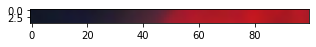

[ 18  18  20  20  20  20  20  20  20  20  22  22  22  22  22  24  24  24
  24  24  24  26  26  28  28  30  30  32  34  36  38  40  42  46  50  52
  54  58  60  62  64  68  70  74  78  82  88  94 100 110 124 136 146 154
 158 164 168 170 172 172 170 168 168 168 168 168 170 170 174 174 174 174
 174 176 176 176 180 184 190 194 196 192 188 184 182 180 178 178 180 178
 174 170 168 172 178 182 184 182 176 170]


In [ ]:
#Images can be manipulated like matrices

#Multiplying the image by 2 shows brighter colors
plt.imshow(CycIFImage[850:855,0:100,:]  *2 )
plt.show()

#This increase is reflected in a 2fold increase in number values
print(CycIFImage[850,0:100,0] *2 )

#NOTE: Be careful adding, subtracting, or multiplying images.
#You will want them to stay within the 0-255 value range otherwise you will get errors.

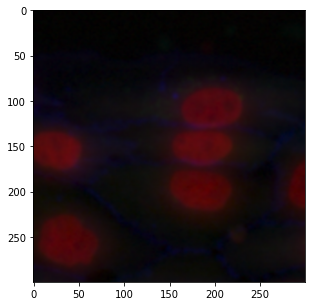

In [ ]:
#Cropping Regions from Images

#Indexing from images works. the same as matrices.
#[rows, cols, channels], counting from the top left corner of the image
#As such, selecting an ROI or specific pixels to manipulate is the same as
#most other python operations
RegionOfInterest=CycIFImage[1500:1800,800:1100,:]
plt.imshow(RegionOfInterest)

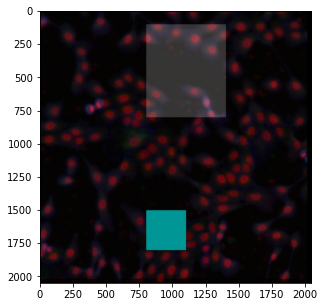

In [ ]:
#We can combine both aspects shown above, indexing and basic matrix operations
EdittedImage=copy.copy(CycIFImage)

#Index specific Region and set to aqua
EdittedImage[1500:1800,800:1100,:]=[0,150,150]

#Index Specific Region and add 50
EdittedImage[100:800,800:1400,:]+=50
plt.imshow(EdittedImage)





---



##**Preprocessing an Image**

###Histogram Stretching

Preprocessing an image is just an important as preprocessing and cleaning other datatypes.
Normalization of intensities is one of the typical preprocessing steps. Luckily since images are just matrices, we can do basic normalization using common mathematical operations.

Text(0.5, 1.0, 'Blue Histogram')

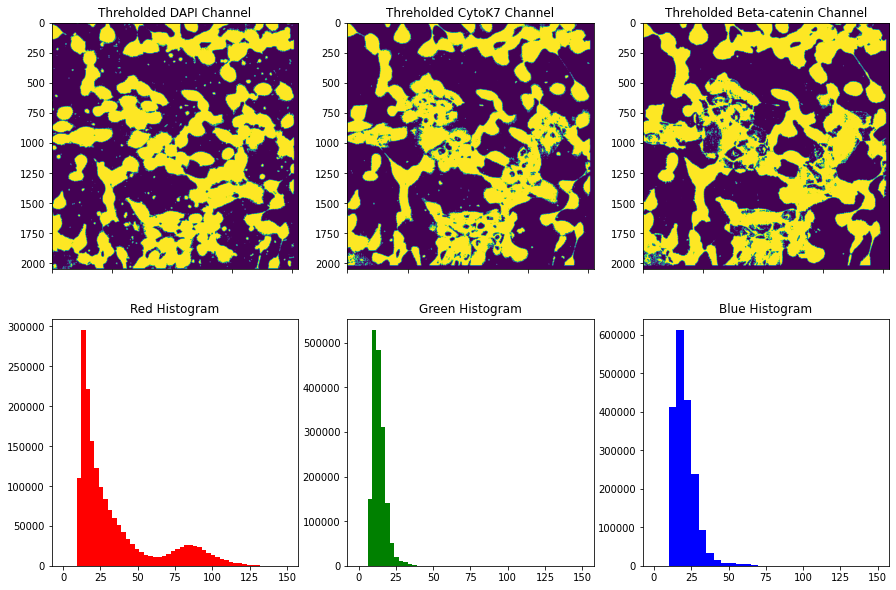

In [ ]:
#Display Current Intensity Histograms for each channel
plt.rcParams['figure.figsize']=[15,10]
fig,ax=plt.subplots(2,3)

ax[0,0].imshow(CycIFImage[:,:,0]>10)
ax[0,0].set_title('Threholded DAPI Channel')
ax[0,0].xaxis.set_ticklabels([])

#Index only the Red Values in the image (greater than 10 to ignore background)
RedValues=CycIFImage[CycIFImage[:,:,0]>10,0]
#Display the red histogram
ax[1,0].hist(RedValues,color='r',bins=50,range=[0, 150])
ax[1,0].set_title('Red Histogram')

ax[0,1].imshow(CycIFImage[:,:,1]>7)
ax[0,1].set_title('Threholded CytoK7 Channel')
ax[0,1].xaxis.set_ticklabels([])

#Index only the Green Values in the image (greater than 7 to ignore background)
GreenValues=CycIFImage[CycIFImage[:,:,1]>7,1]
#Display the green histogram
ax[1,1].hist(GreenValues,color='g',bins=50,range=[0, 150])
ax[1,1].set_title('Green Histogram')

ax[0,2].imshow(CycIFImage[:,:,2]>10)
ax[0,2].set_title('Threholded Beta-catenin Channel')
ax[0,2].xaxis.set_ticklabels([])

#Index only the Blue Values in the image (greater than 10 to ignore background)
BlueValues=CycIFImage[CycIFImage[:,:,2]>10,2]
#Display the Blue histogram
ax[1,2].hist(BlueValues,color='b',bins=30,range=[0, 150])
ax[1,2].set_title('Blue Histogram')


As we can see, the channels are fairly uneven, which can make analysis and visualization difficult. Ideally, we'd want to utilize the full range of data, so we can stretch the values from 0-255.

Note: This works across many images as well. One problem with multiplex data is that staining intensity will differ from image to image. If we make the assumption that the max stain intensity should be the same between the two image (likely because they both have at least one cell of the same type), then we can stretch them to match distributions.

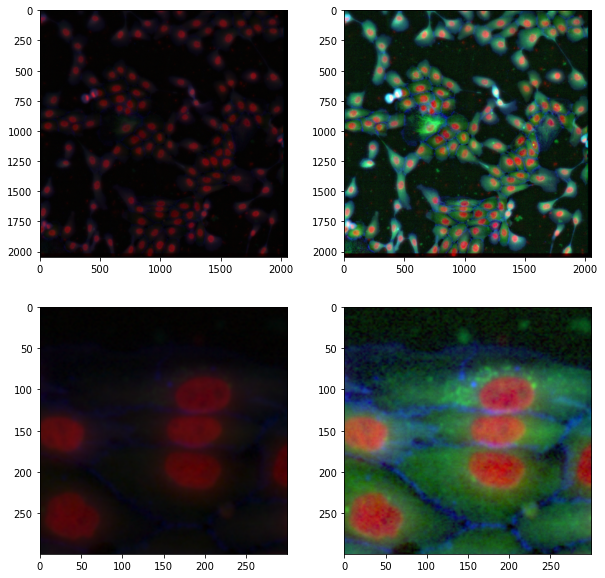

In [ ]:
#Stetch the Intensities
import numpy as np
StretchedImage=copy.copy(CycIFImage)
from skimage import exposure

p2, p98 = np.percentile(CycIFImage[:,:,0], (2, 99.9))
StretchedImage[:,:,0] = exposure.rescale_intensity(CycIFImage[:,:,0], in_range=(p2, p98))

# Subtract the minimum value of all so that 0 is the smallest value 
# Then divide by the max so the range is 0-1
# Then multiply by 255 to get back into image range

#Stretch CytoK using process described above
p2, p98 = np.percentile(CycIFImage[:,:,1], (2, 99.9))
StretchedImage[:,:,1] = exposure.rescale_intensity(CycIFImage[:,:,1], in_range=(p2, p98))

#Stretch Beta-Catenin using process described above
p2, p98 = np.percentile(CycIFImage[:,:,2], (2, 99.9))
StretchedImage[:,:,2] = exposure.rescale_intensity(CycIFImage[:,:,2], in_range=(p2, p98))


plt.rcParams['figure.figsize']=[10,10]
fig,ax=plt.subplots(2,2)
StretchedImage=StretchedImage.astype('uint8')
ax[0,0].imshow(CycIFImage)
ax[0,1].imshow(StretchedImage)
ax[1,0].imshow(CycIFImage[1500:1800,800:1100,:])
ax[1,1].imshow(StretchedImage[1500:1800,800:1100,:])


#As we can see below, Visualization is much easier following normalization

Text(0.5, 1.0, 'B-Catenin Histogram After')

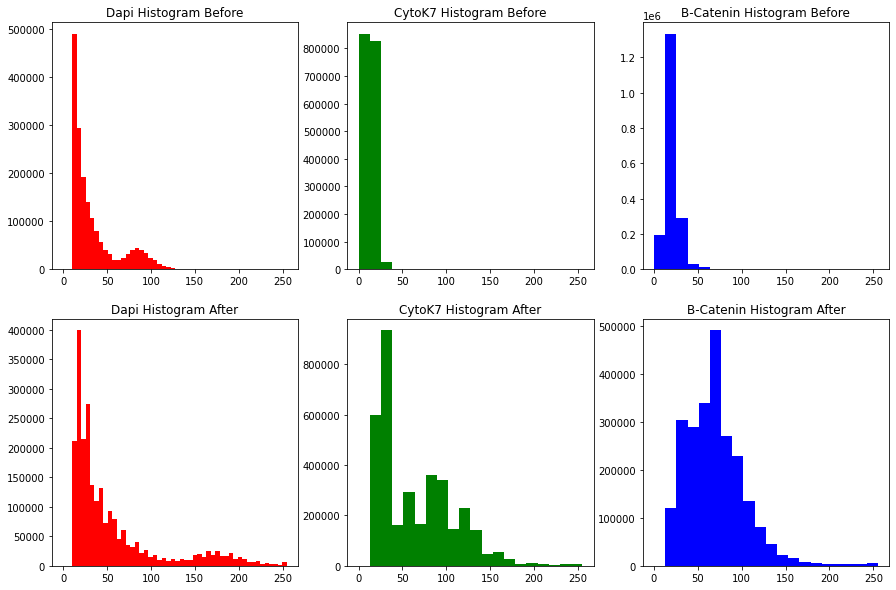

In [ ]:
#Display Updated Intensity Histograms for each channel
plt.rcParams['figure.figsize']=[15,10]
fig,ax=plt.subplots(2,3)

RedValues=CycIFImage[CycIFImage[:,:,0]>10,0]
ax[0,0].hist(RedValues,color='r',bins=50,range=[0, 255])
ax[0,0].set_title('Dapi Histogram Before')
RedValues=StretchedImage[StretchedImage[:,:,0]>12,0]
ax[1,0].hist(RedValues,color='r',bins=50,range=[0, 255])
ax[1,0].set_title('Dapi Histogram After')


GreenValues=CycIFImage[CycIFImage[:,:,1]>7,1]
ax[0,1].hist(GreenValues,color='g',bins=20,range=[0, 255])
ax[0,1].set_title('CytoK7 Histogram Before')
GreenValues=StretchedImage[StretchedImage[:,:,1]>20,1]
ax[1,1].hist(GreenValues,color='g',bins=20,range=[0, 255])
ax[1,1].set_title('CytoK7 Histogram After')

BlueValues=CycIFImage[CycIFImage[:,:,2]>10,2]
ax[0,2].hist(BlueValues,color='b',bins=20,range=[0, 255])
ax[0,2].set_title('B-Catenin Histogram Before')
BlueValues=StretchedImage[StretchedImage[:,:,2]>20,2]
ax[1,2].hist(BlueValues,color='b',bins=20,range=[0, 255])
ax[1,2].set_title('B-Catenin Histogram After')

#The overall shape of the distributions for each channel has 

##Other Recommeded Normalization Options:

Normalization is tricky and there are many functions and algorithms available, each with different assumptions and levels of quality and ease.

Multiplex imaging data like CycIF does not have a standard normalization method that can just fix staining differences between images. The method used will need to be considered and selected for your purpose and dataset.

Some recommended options:

H&E: StainTools... particularly Reinhard normalization (https://github.com/Peter554/StainTools)

![Text](https://developer-blogs.nvidia.com/wp-content/uploads/2021/07/stain-normalization-filter-1-625x393.png)

Multiplex Images: RESTORE... comes with some assumptions of stain independence(https://www.nature.com/articles/s42003-020-0828-1)

![Text](https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fs42003-020-0828-1/MediaObjects/42003_2020_828_Fig7_HTML.png?as=webp)

###Smoothing An Image

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `mu

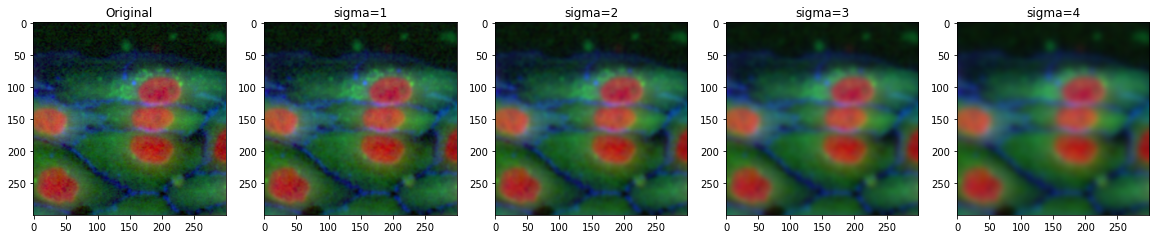

In [ ]:
#Apply a Gaussian Filter to Remove Noise
from skimage.filters import gaussian

#Gaussian Filters apply a weighted curve to a pixel where averaging is done with neighboring pixels. 
# This method is variable and good at removing noise, but can remove edges

plt.rcParams['figure.figsize']=[20,80]
StretchedROI=StretchedImage[1500:1800,800:1100,:]
#Guassian Filter can be applied with varying strength (sigma)
Gaussian1ROI=gaussian(StretchedROI, sigma=1)
Gaussian2ROI=gaussian(StretchedROI, sigma=2)
Gaussian3ROI=gaussian(StretchedROI, sigma=3)
Gaussian4ROI=gaussian(StretchedROI, sigma=4)

fig,ax=plt.subplots(1,5)
ax[0].imshow(StretchedROI)
ax[0].set_title('Original')
ax[1].imshow(Gaussian1ROI)
ax[1].set_title('sigma=1')
ax[2].imshow(Gaussian2ROI)
ax[2].set_title('sigma=2')
ax[3].imshow(Gaussian3ROI)
ax[3].set_title('sigma=3')
ax[4].imshow(Gaussian4ROI)
ax[4].set_title('sigma=4')

#Keeping this smoothed image for later
SmoothedImage=(gaussian(StretchedImage, sigma=2)*255).astype('uint8')

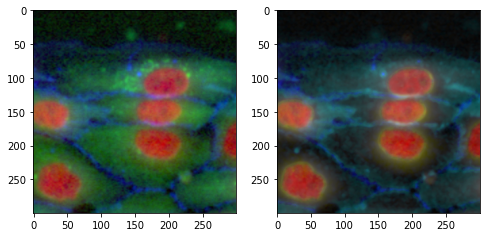

In [ ]:
#Apply a Median Filter
from skimage.filters import median

#The median filter replaces each pixel with the median of the surrounding pixels.
#Thus removing pixels that are singularly bright or dim.
#This method is not as customizable, but is better at preserving edges.

plt.rcParams['figure.figsize']=[8,16]
StretchedROI=StretchedImage[1500:1800,800:1100,:]
MedianROI=median(StretchedROI)


fig,ax=plt.subplots(1,2)
ax[0].imshow(StretchedROI)
ax[1].imshow(MedianROI)


Other Examples of Smoothing Images to remove Noise:
- OpenCV: https://towardsdatascience.com/image-filters-in-python-26ee938e57d2
![Text](https://miro.medium.com/max/596/1*TAiNOanV2oZkB5rJY9T8Gw.png)

- Denoising VAEs: https://github.com/rshnn/xray-denoising
![Text](https://github.com/rshnn/xray-denoising/blob/master/images/06.png?raw=true)



---



# **Image Segmentation**

## Basic Image Segmentation
Using Binary Functions and Thresholding

Because Images are matrices, we can threhold and index pixels that are above certain values.

This allows us to isolate cells based on expression.

We can then use simple binary operations to edit and control our segmentations.

NOTE: Thresholding can work using combinations of stains, and if separating individual cells is necessary, it will be important to have a good membrane marker.

Text(0.5, 1.0, 'Labeled cell objects')

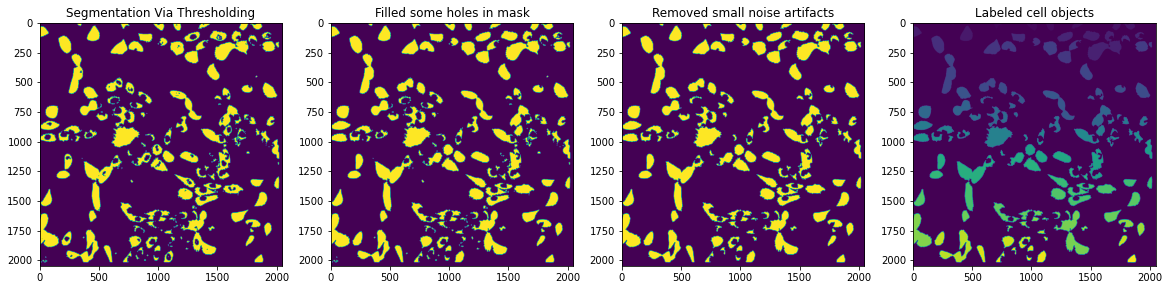

In [ ]:
#Thresholding of the Cytoplasmic Marker
from scipy import ndimage
from skimage.segmentation import watershed,mark_boundaries
from skimage.morphology import disk, remove_small_objects
from skimage.measure import label
from skimage.filters import rank



plt.rcParams['figure.figsize']=[20,5]

fig,ax=plt.subplots(1,4)

#Thresholding all pixels with cytoplasmic intensity values above 20%
ThreshMask=SmoothedImage[:,:,1]>100
ax[0].imshow(ThreshMask)
ax[0].set_title('Segmentation Via Thresholding')

#The produced masks have holes throughout, it might be necessary to fill the holes to make more solid masks
FilledMask=ndimage.binary_fill_holes(ThreshMask)
ax[1].imshow(FilledMask)
ax[1].set_title('Filled some holes in mask')

#There have accidentally been small noisy things segmented, we can remove those with a simple function
DeSmalledMask=remove_small_objects(FilledMask,500)
ax[2].imshow(DeSmalledMask)
ax[2].set_title('Removed small noise artifacts')

#We can then label each independent object.
#Note how the labeled object accidentally group many cells together.
#Some improvements can be made with better algorithms or better membrane markers
ThresholdingLabels=label(DeSmalledMask)
ax[3].imshow(ThresholdingLabels)
ax[3].set_title('Labeled cell objects')


See more basic threholding here: https://scikit-image.org/docs/0.13.x/auto_examples/xx_applications/plot_thresholding.html
![Text](https://scikit-image.org/docs/0.13.x/_images/sphx_glr_plot_thresholding_004.png)

And examples of binary operations here: https://scikit-image.org/docs/dev/api/skimage.morphology.html

Some particularly useful ones include:
- dilation: inflates all cell masks
- erosion: slims all cell masks
- skeletonize: turns masks into the thin lines that make up the image

## Watershed Segmentation

Watershed segmentation works by filling up basins from a set of seed points.
Imagine filling a series of adjacent mountain lakes with water until they overflow into one another. After the two waterlines touch, that is the boundary.

![Text](https://ars.els-cdn.com/content/image/3-s2.0-B9780124158733000043-f04-13-9780124158733.jpg)


Text(0.5, 1.0, 'Watershed Segmentations')

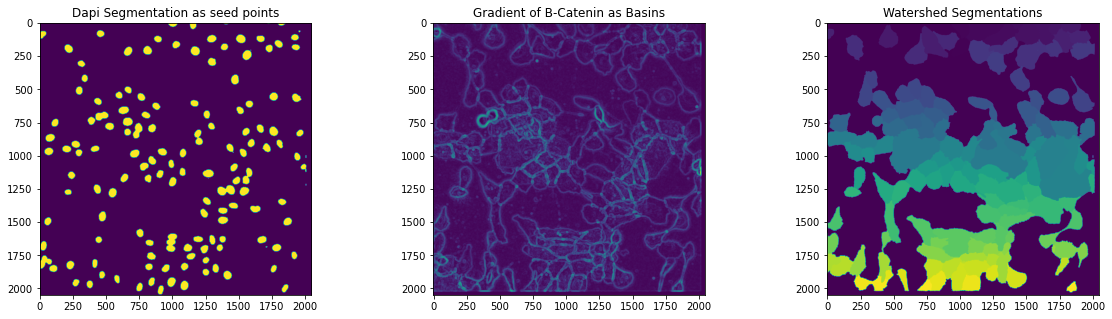

In [ ]:
#Watershed Method

#This is just a function to remove large objects since only "remove_SMALL_objects" is implemented in skimage
def remove_large_objects(segments,max_size):
    out = np.copy(segments)
    component_sizes = np.bincount(segments.ravel())
    too_small = component_sizes > max_size
    too_small_mask = too_small[segments]
    out[too_small_mask] = 0
    return out

fig,ax=plt.subplots(1,3)
#Threshold DAPI Greater than 40%
#These will be used as the seed points for watershed
Dapimarkers = SmoothedImage[:,:,0]>100
ax[0].imshow(Dapimarkers)
ax[0].set_title('Dapi Segmentation as seed points')
Dapimarkers = label(Dapimarkers)

#Compute the gradients of the B-Catenin
#These will be used as the basins of the watershed
Cellgradient = rank.gradient(SmoothedImage[:,:,2], disk(5))
ax[1].imshow(Cellgradient)
ax[1].set_title('Gradient of B-Catenin as Basins')

#Compute the watersheds
WatershedLabels = watershed(Cellgradient, Dapimarkers)
WatershedLabels=label(remove_large_objects(WatershedLabels,100000))#Remove large objects to remove background
ax[2].imshow(WatershedLabels)
ax[2].set_title('Watershed Segmentations')

Other Intermediate Segmentation Methods:

- See Otsu's Method

![Text](https://miro.medium.com/max/900/0*lanBhBYVO9ILBR2l.png)

- Kmeans Clustering for segmentation

![Text](https://miro.medium.com/max/700/1*SqtH48BD6NkW-oI21mlpDg.png)

- Random Forest Segmentation

![Text](https://d3i71xaburhd42.cloudfront.net/824245db92a1910a8bc033939b9413ed08263aba/1-Figure1-1.png)

## Deep Learning Segmentation
Here we will discuss Cellpose (a pretrained deep learning image segmentation tool that is made to be applied generally to segment cells from many modalities.

In [ ]:
#We must install cellpose since Google does not carry it pre-installed
!pip install cellpose
import numpy as np
import time, os, sys
from urllib.parse import urlparse
import skimage.io
import matplotlib.pyplot as plt
from urllib.parse import urlparse
from cellpose import models

use_GPU = models.use_gpu()
print('>>> GPU activated? %d'%use_GPU)

2021-09-15 23:51:35,950 [INFO] WRITING LOG OUTPUT TO /root/.cellpose/run.log
2021-09-15 23:51:37,950 [INFO] ** TORCH CUDA version installed and working. **
>>> GPU activated? 1


In [ ]:
from cellpose import utils
from cellpose import models

#check to see if using GPU.
#If not, that's okay, it'll just run slower
#for this walkthrough it should be fine, but for full analysis of many images,
#I STRONGLY encourage using a GPU
model = models.Cellpose(gpu=use_GPU, model_type='cyto')

2021-09-15 23:51:37,971 [INFO] ** TORCH CUDA version installed and working. **
2021-09-15 23:51:37,972 [INFO] >>>> using GPU


In [ ]:
# RUN CELLPOSE


# DEFINE CELLPOSE MODEL
# model_type='cyto' or model_type='nuclei'


# define CHANNELS to run segementation on
# grayscale=0, R=1, G=2, B=3
# channels = [cytoplasm, nucleus]
# if NUCLEUS channel does not exist, set the second channel to 0
# channels = [0,0]
# IF ALL YOUR IMAGES ARE THE SAME TYPE, you can give a list with 2 elements
# channels = [0,0] # IF YOU HAVE GRAYSCALE
# channels = [2,3] # IF YOU HAVE G=cytoplasm and B=nucleus
# channels = [2,1] # IF YOU HAVE G=cytoplasm and R=nucleus

# or if you have different types of channels in each image
channels =  [2,1]

# if diameter is set to None, the size of the cells is estimated on a per image basis
# you can set the average cell `diameter` in pixels yourself (recommended) 
# diameter can be a list or a single number for all images

CellPosemasks, flows, styles, diams = model.eval(SmoothedImage, diameter=None, flow_threshold=None, channels=channels)


2021-09-15 23:51:38,099 [INFO] ~~~ ESTIMATING CELL DIAMETER(S) ~~~


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


2021-09-15 23:52:03,757 [INFO] estimated cell diameter(s) in 25.66 sec
2021-09-15 23:52:03,758 [INFO] >>> diameter(s) = 
2021-09-15 23:52:03,765 [INFO] [ 101.91 ]
2021-09-15 23:52:03,769 [INFO] ~~~ FINDING MASKS ~~~


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3982: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  "Default grid_sample and affine_grid behavior has changed "


2021-09-15 23:52:07,416 [INFO] >>>> TOTAL TIME 29.32 sec


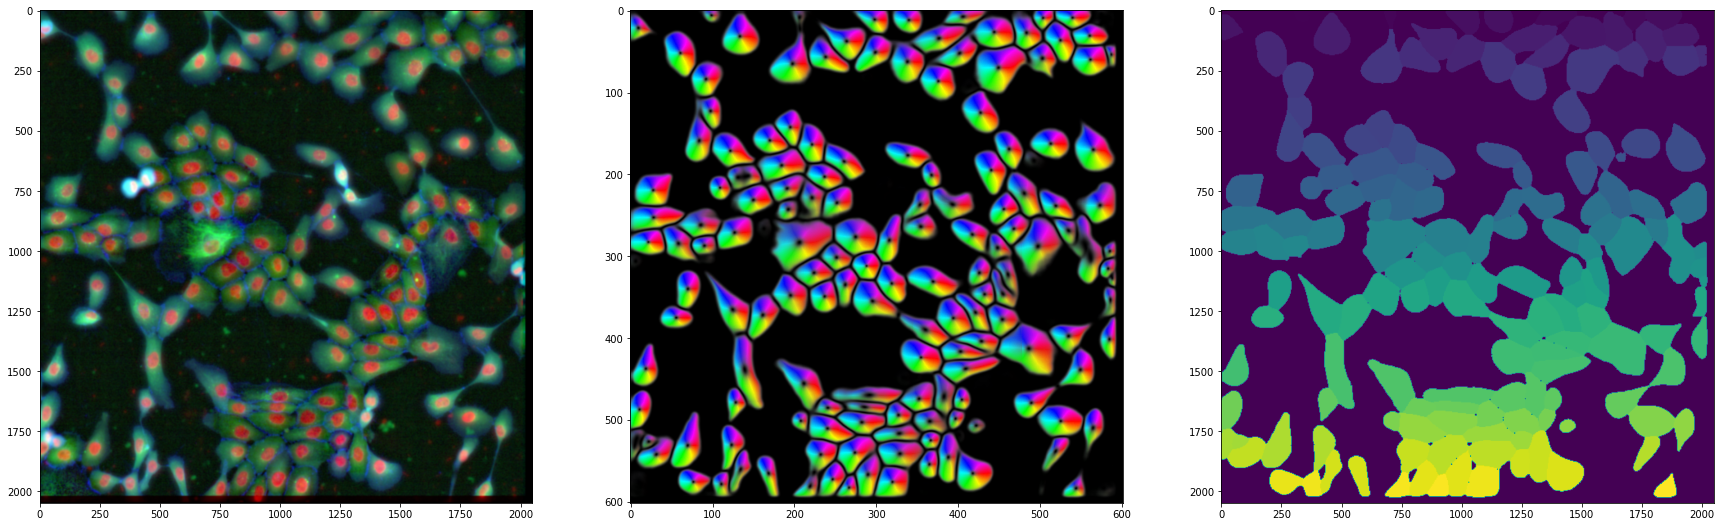

In [ ]:
plt.rcParams['figure.figsize']=[30,10]
fig,ax=plt.subplots(1,3)
ax[0].imshow(SmoothedImage)
ax[1].imshow(flows[0])
ax[2].imshow(CellPosemasks)

Other Machine Learning and Deep Learning options for segmentation:

- Ilastik: Machine Learning program that allows you to draw labels and train on the fly (https://www.ilastik.org/)

![Text](https://www.ilastik.org/documentation/pixelclassification/snapshots/first_prediction.png)
![Text](https://www.ilastik.org/documentation/pixelclassification/snapshots/segmentation.png)

- UNet,SegNet,etc: Many Deep Learning architectures developed for segmentation, trainging them will take practice, but will be versatile to your task. Furthermore, UNets will be able to segment more complex histologic features, tissues, and tumors that are not easily predicted with more simple methods.

![Text](https://www.researchgate.net/profile/Alan-Jackson-2/publication/323597886/figure/fig2/AS:601386504957959@1520393124691/Convolutional-neural-network-CNN-architecture-based-on-UNET-Ronneberger-et-al.png)



## Comparison of the three example methods:

Text(0.5, 1.0, 'CellPose Segmentations')

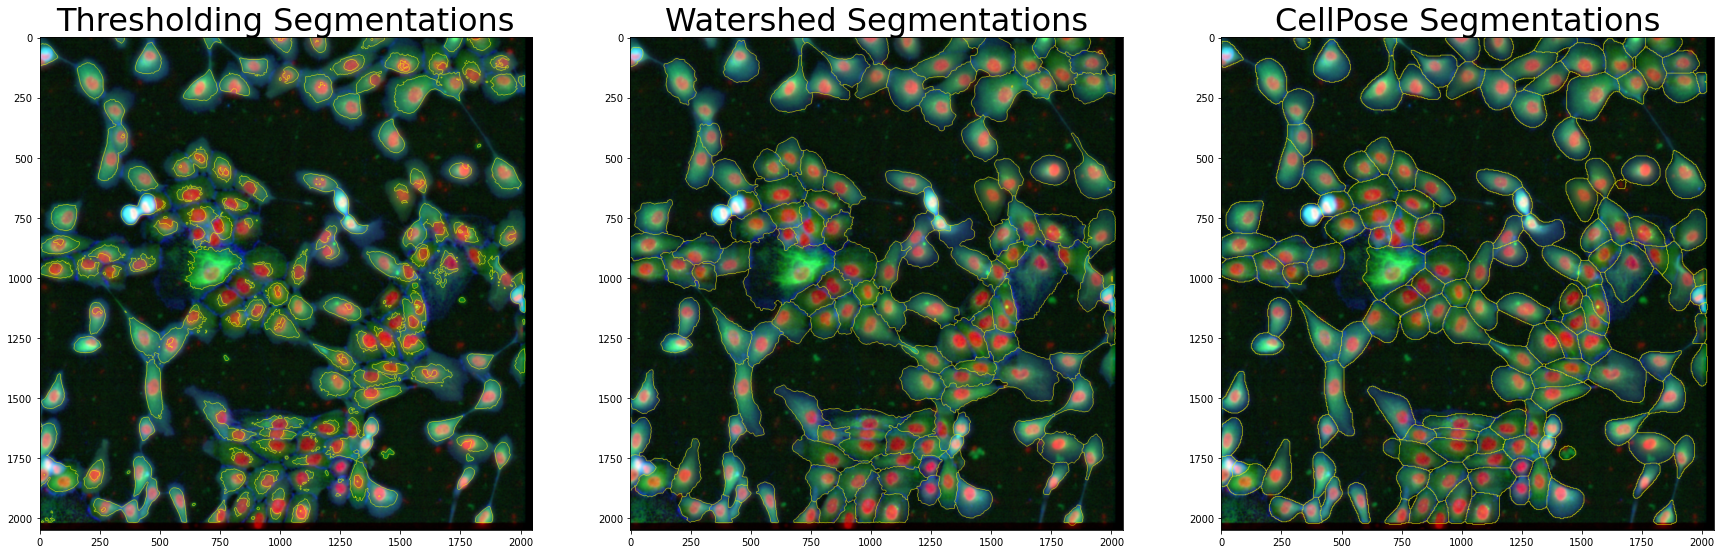

In [ ]:
plt.rcParams['figure.figsize']=[30,10]
fig,ax=plt.subplots(1,3)
ax[0].imshow(mark_boundaries(SmoothedImage,ThreshMask,mode='thick'))
ax[0].set_title('Thresholding Segmentations',size=32)
ax[1].imshow(mark_boundaries(SmoothedImage,WatershedLabels,mode='thick'))
ax[1].set_title('Watershed Segmentations',size=32)
ax[2].imshow(mark_boundaries(SmoothedImage,CellPosemasks,mode='thick'))
ax[2].set_title('CellPose Segmentations',size=32)




---



# Feature Extraction

### Extracting Basic Features

These are features that are readily available from the cell mask and image with simple operations. 

Skimage provides the ability to extract these features with a single command.

In [ ]:
from skimage.measure import regionprops_table
import pandas as pd

#this function extract properties from the cell label image we produced earlier
Properties=regionprops_table(label_image=CellPosemasks,intensity_image=SmoothedImage[:,:,0],
                             properties=['label','centroid','area','eccentricity','extent','major_axis_length','minor_axis_length',
                                         'max_intensity','mean_intensity','perimeter','solidity','intensity_image'])
Properties=pd.DataFrame(Properties)
Properties


label  ...                                    intensity_image
0        1  ...  [[0, 0, 0, 0, 0, 0, 0, 60, 62, 64, 66, 68, 69,...
1        2  ...  [[0, 0, 0, 0, 0, 0, 0, 63, 64, 65, 65, 65, 65,...
2        3  ...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
3        4  ...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
4        5  ...  [[19, 18, 18, 19, 21, 23, 25, 27, 30, 33, 36, ...
..     ...  ...                                                ...
147    148  ...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
148    149  ...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
149    150  ...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
150    151  ...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
151    152  ...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...

[152 rows x 13 columns]

## Extracting Complicated Texture Features

Images have a lot of information in them, but a lot of it is hard to know before hand and complicated to evaluate with conventional metrics.

Some have collected sets of relevant features that can be extracted from images. An example of this includes the "haralick texture features."

There are many possible collections and metrics. Many may be irrelevant or redundant. You must carefully select what best applies to your data.

https://murphylab.web.cmu.edu/publications/boland/boland_node26.html

https://gogul.dev/software/texture-recognition

In [ ]:
!pip install mahotas

     |████████████████████████████████| 5.7 MB 5.4 MB/s 


In [ ]:
import mahotas as mt
def extract_features(image):
	# calculate haralick texture features for 4 types of adjacency
	textures = mt.features.haralick(image)
	# take the mean of it and return it
	ht_mean  = textures.mean(axis=0)
	return ht_mean

CellTextures=[]
#Calculate the features in loop for all cell images
for Image in Properties['intensity_image']:
  Image=(Image*255).astype('uint8')
  CellTextures.append( extract_features(Image))

TextureProperties=pd.DataFrame(np.reshape(CellTextures,(len(Properties['intensity_image']),13)))
TextureProperties

0            1         2   ...        10        11        12
0    0.040399  1835.644564  0.891751  ...  1.933142 -0.643364  0.999388
1    0.117250  1952.932786  0.915081  ...  1.735843 -0.654483  0.998454
2    0.073275  1122.219192  0.944598  ...  1.974715 -0.683339  0.999640
3    0.079014  1192.258493  0.941660  ...  1.955880 -0.663323  0.999486
4    0.062071   834.780982  0.957160  ...  2.168362 -0.680720  0.999774
..        ...          ...       ...  ...       ...       ...       ...
147  0.027734   767.879057  0.955558  ...  2.790538 -0.635145  0.999867
148  0.060414  1176.742369  0.924245  ...  3.149813 -0.580567  0.999593
149  0.128800  1056.850416  0.939776  ...  2.937911 -0.603717  0.999429
150  0.092872  1079.832830  0.942696  ...  2.769980 -0.625667  0.999613
151  0.132183  1163.550565  0.937579  ...  3.011845 -0.612451  0.999464

[152 rows x 13 columns]

## Recommended Deep Learning Method for feature Extraction
Variational Auto Encoders (https://github.com/lyeoni/keras-mnist-VAE/blob/master/keras-mnist-VAE.ipynb)

![Text](https://miro.medium.com/max/1838/1*I5MVGIrROrAnD3U_2Jm1Ng.png)

Variational Autoencoders will allow the extraction of features that might otherwise be unquantifiable. However, interpreting what the features actually are biologically can be tricky and is an area of ongoing research.

VAEs are best used for things where the identity of the features are not as important as the results of what the features do. ie (Clustering cell types. The features might not be important if you can successfully separate the cell populations).






---



# Image Registration

Image registration is the process of aligning two images of the same thing, which might originally not overlap in the image.

There are numerous methods and algorithms for registration, I will here discuss two basic methods.

## Affine Registration
This form of registration is simple and is used to overcome basic problems of overlap such as rotation, translation, streching, and shear, but cannot deform the images to force them to overlap.


In [ ]:
!pip install SimpleITK

     |████████████████████████████████| 48.4 MB 4.4 kB/s 


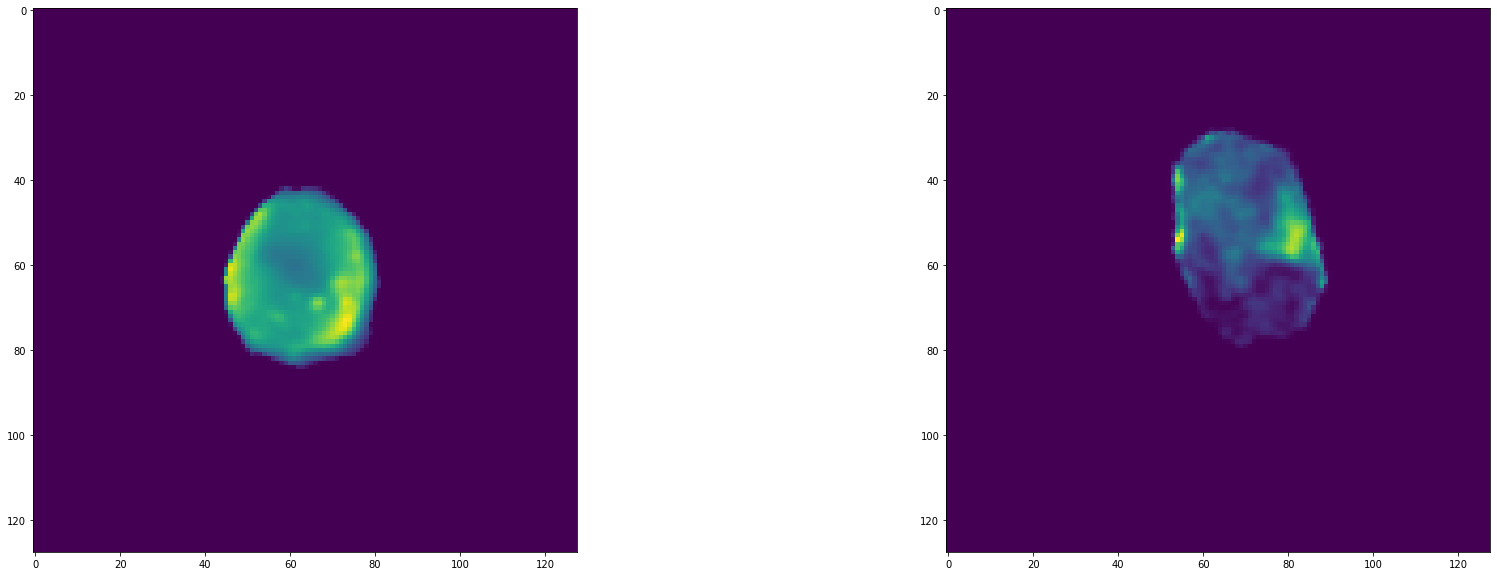

In [ ]:
import SimpleITK as sitk

files=glob.glob('./drive/MyDrive/Image Analysis Class/RegistrationImages/FixedImage.tif')
fixed=sitk.ReadImage(files[0], sitk.sitkFloat32)

files=glob.glob('./drive/MyDrive/Image Analysis Class/RegistrationImages/MovingImage.tif')
moving=sitk.ReadImage(files[0], sitk.sitkFloat32)

fixedNP=sitk.GetArrayFromImage(fixed).astype('uint8')
movingNP = sitk.GetArrayFromImage(moving).astype('uint8')

fig,ax=plt.subplots(1,2)
ax[0].imshow(fixedNP)
ax[1].imshow(movingNP)

In [ ]:
## Calculate TForm from image pairs
R = sitk.ImageRegistrationMethod()
R.SetMetricAsCorrelation() #Using correlation as metric
R.SetOptimizerAsRegularStepGradientDescent(.01, .0001, 200) #Parameters for optimization (maxstep, minstep, iterations)
R.SetInitialTransform(sitk.AffineTransform(fixed.GetDimension())) #We are using Affine Transform
R.SetInterpolator(sitk.sitkAffine)
outTx = R.Execute(fixed, moving)
      

#Apply transformation to moving image    
resampler = sitk.ResampleImageFilter()
resampler.SetReferenceImage(fixed)
resampler.SetInterpolator(sitk.sitkAffine)
resampler.SetDefaultPixelValue(100) #This should normally be 0 for black, but I set to 100 so you can see rotations
resampler.SetTransform(outTx)

out = resampler.Execute(moving)

Text(0.5, 1.0, 'Registered two images (red = moving, blue = fixed)')

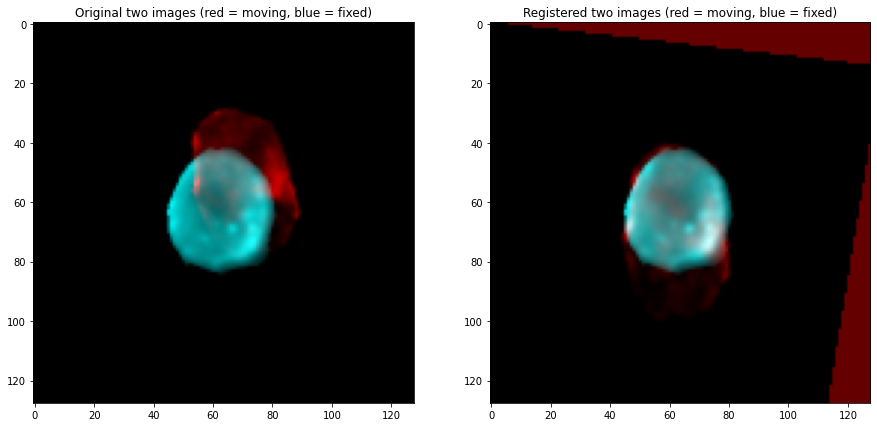

In [ ]:
#Get images back in numpy
nda = sitk.GetArrayFromImage(out).astype('uint8')

#Display comparison images
plt.rcParams['figure.figsize']=[15,30]
fig,ax=plt.subplots(1,2)
ax[0].imshow(np.dstack((movingNP,fixedNP,fixedNP)))
ax[0].set_title('Original two images (red = moving, blue = fixed)')

ax[1].imshow(np.dstack((nda,fixedNP,fixedNP)))
ax[1].set_title('Registered two images (red = moving, blue = fixed)')

##Bspline Registration
This form of registration is more complex, using regional and non-linear transformations and is used to overcome registration problems for images that don't directly correspond.

This method can produce accurate results on the pixel level, but might cause artifacts or poor deformities in data.


In [ ]:
## Calculate TForm from image pairs

#Creating a mesh for Bspline to deform 
transformDomainMeshSize=[2]*fixed.GetDimension()
tx = sitk.BSplineTransformInitializer(fixed,transformDomainMeshSize )

R = sitk.ImageRegistrationMethod()
R.SetMetricAsJointHistogramMutualInformation() #Using Mutual Information as metric
R.SetOptimizerAsRegularStepGradientDescent(5, .001, 1000) 
R.SetInitialTransform(sitk.BSplineTransform(tx)) #We are using Bspline Transform
R.SetInterpolator(sitk.sitkBSpline)
outTx = R.Execute(fixed, moving)
      

#Apply transformation to moving image    
resampler = sitk.ResampleImageFilter()
resampler.SetReferenceImage(fixed)
resampler.SetInterpolator(sitk.sitkBSpline)
resampler.SetDefaultPixelValue(100) #This should normally be 0 for black, but I set to 100 so you can see rotations
resampler.SetTransform(outTx)

out = resampler.Execute(moving)

Text(0.5, 1.0, 'Registered two images (red = moving, blue = fixed)')

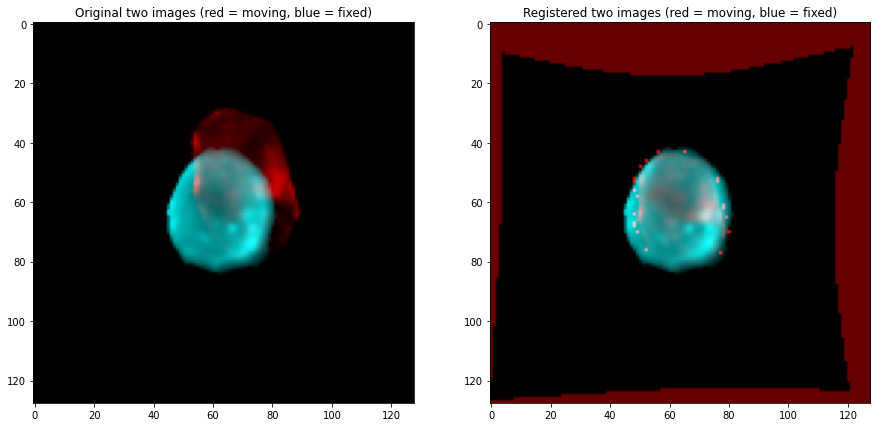

In [ ]:
#Get images back in numpy
nda = sitk.GetArrayFromImage(out).astype('uint8')
fixedNP=sitk.GetArrayFromImage(fixed).astype('uint8')
movingNP = sitk.GetArrayFromImage(moving).astype('uint8')

#Display comparison images
plt.rcParams['figure.figsize']=[15,30]
fig,ax=plt.subplots(1,2)
ax[0].imshow(np.dstack((movingNP,fixedNP,fixedNP)))
ax[0].set_title('Original two images (red = moving, blue = fixed)')

ax[1].imshow(np.dstack((nda,fixedNP,fixedNP)))
ax[1].set_title('Registered two images (red = moving, blue = fixed)')

#NOTE the substantial deformation to get them to fit, as well as the single point artifacts

### Other recommended registration methods

There are many many other registration methods, each with their own pros and cons. Today I showed two of the basic operations.

- Personally I have found that many of the python registration libraries are needlessly difficult to manage or are not straight forward in their implementation. 
SimpleElastix is a wrapper for the simpleITK that we used today that attempts to make things easier to implement and run on GPU as well. I did not use it today because it requires a download and build process not fit for a class.

![Text](https://biii.eu/sites/default/files/styles/large/public/2018-07/simpleElastix.png?itok=d_WNNOKS)


- I have done most of my image registration in MatLab. I have found that it is better documented and more straight forward. It also has a GUI for playing around with the registration.

![Text](https://www.mathworks.com/discovery/image-registration/_jcr_content/mainParsys/image_1639110054.adapt.full.medium.jpg/1623439497552.jpg)








---



#**Conclusion**

Hopefully we can all see that images are nothing more than matrices like other forms of data in python, and can be analyzed and manipulated just as easily.

There are numerous functions readily available for basic analysis, algorithmic analysis, as well as machine learning and deep learning analysis.

The level of tool you use should depend of the application and quality of your data. There is no need to use Deep Learning for something as simple as removing a single artifact, but using simple functions alone will limit you from accessing a wealth off knowledge. Understanding the mixture of what you can/should use for which portion of the project is the real art of image analysis. 